In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import torch
import matplotlib.pyplot as plt

Source here does not help

In [3]:
ice_vel = xr.load_dataset("/home/kim/data/nsidc/antarctic_ice_vel_phase_map_v01.nc")

# Define new variable: speed V: sqrt(VX**2 + VY**2)
# hypot is numerically more stable than sqrt(VX**2 + VY**2)
ice_vel["V"] = np.hypot(ice_vel["VX"], ice_vel["VY"])

In [12]:
x_min = - 600_000
x_max = 400_000
y_min = - 1_400_000
y_max = - 400_000

ice_vel_ross = ice_vel.sel(
    x = slice(x_min, x_max), 
    y = slice(y_max, y_min))

In [13]:
ice_vel_ross

<xarray.Dataset>
Dimensions:       (x: 2223, y: 2222)
Coordinates:
  * x             (x) float64 -6e+05 -5.995e+05 -5.99e+05 ... 3.995e+05 4e+05
  * y             (y) float64 -4.004e+05 -4.008e+05 ... -1.399e+06 -1.4e+06
    lat           (y, x) float64 -83.37 -83.37 -83.38 ... -76.66 -76.66 -76.66
    lon           (y, x) float64 236.3 236.3 236.2 236.2 ... 164.1 164.1 164.1
Data variables:
    coord_system  |S1 b''
    VX            (y, x) float32 12.16 12.11 11.48 10.77 ... nan nan nan nan
    VY            (y, x) float32 0.08527 0.174 0.1077 -0.0502 ... nan nan nan
    STDX          (y, x) float32 0.2943 0.1676 0.2148 0.3331 ... nan nan nan nan
    STDY          (y, x) float32 0.7608 0.4851 0.683 1.092 ... nan nan nan nan
    ERRX          (y, x) float32 0.4791 0.3609 0.3734 0.3966 ... nan nan nan nan
    ERRY          (y, x) float32 0.2238 0.1654 0.2066 0.3013 ... nan nan nan nan
    CNT           (y, x) int32 15 15 15 15 15 15 15 15 15 ... 0 0 0 0 0 0 0 0 0
    SOURCE        (y, x) int8 3 3 3 3 3 3 3 3 3 1 1 1 ... 0 0 0 0 0 0 0 0 0 0 0
    V             (y, x) float32 12.16 12.11 11.48 10.77 ... nan nan nan nan
Attributes: (12/27)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        v_mix.v8Jul2019.nc
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing
    product_version:            
    ...                        ...
    time_coverage_start:       1995-01-01
    time_coverage_end:         2016-12-31
    project:                   NASA/MEaSUREs
    creator_name:              J. Mouginot
    comment:                    
    license:                   No restrictions on access or use.

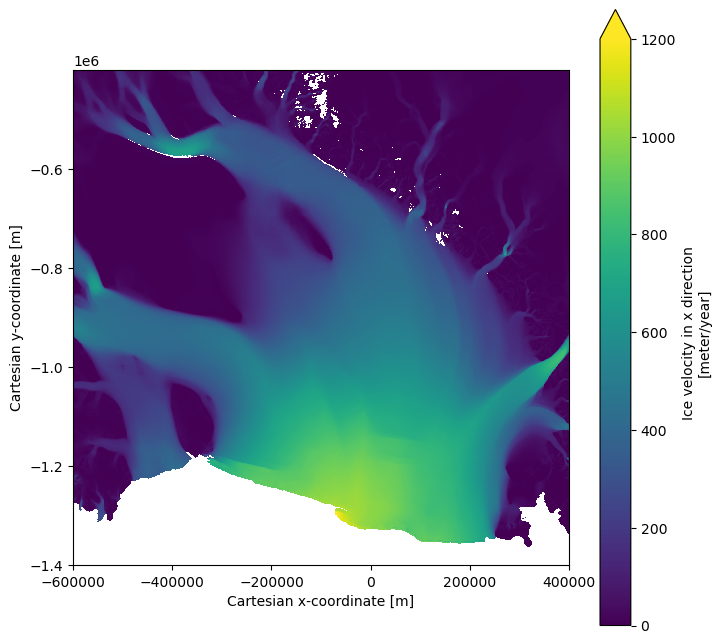

In [16]:
fig, ax = plt.subplots(figsize = (8, 8))

# Plot using pcolormesh
ice_vel_ross.V.plot.pcolormesh(ax = ax, cmap = "viridis", vmin = 0, vmax = 1200)

ax.set_aspect("equal")
plt.show()

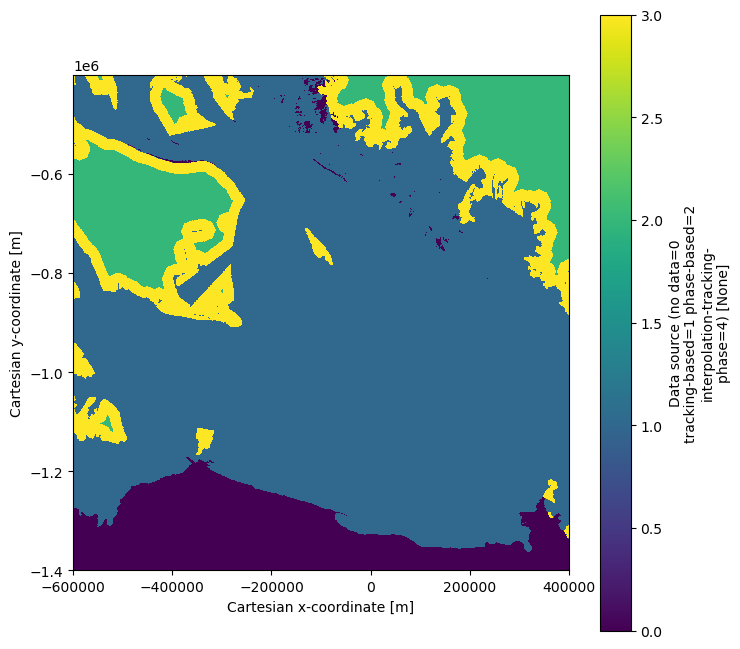

In [19]:
fig, ax = plt.subplots(figsize = (8, 8))

# Plot using pcolormesh
ice_vel_ross.SOURCE.plot.pcolormesh(ax = ax, cmap = "viridis")

ax.set_aspect("equal")
plt.show()